In [105]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [106]:
df=pd.read_csv("breast_cancer_data.csv")

In [107]:
df.head(3)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events


In [108]:
df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

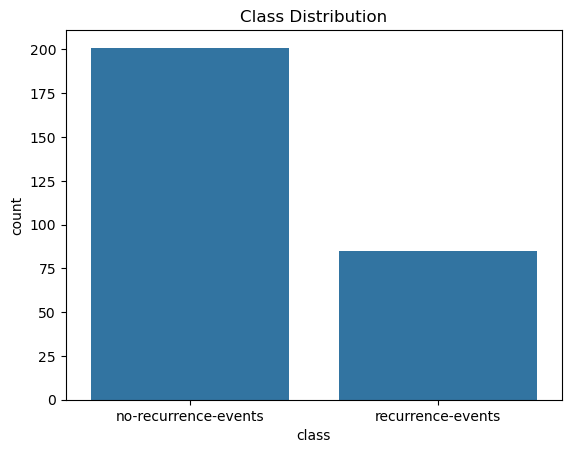

In [109]:
sns.countplot(x="class",data=df)
plt.title('Class Distribution')
plt.show()

In [110]:
df=pd.get_dummies(df,columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)

In [111]:
df

,deg-malig,class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_09-May,...,inv-nodes_14-Dec,inv-nodes_15-17,inv-nodes_24-26,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,no-recurrence-events,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,no-recurrence-events,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,2,no-recurrence-events,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2,no-recurrence-events,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2,no-recurrence-events,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2,recurrence-events,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
282,3,recurrence-events,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
283,1,recurrence-events,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
284,3,recurrence-events,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [112]:
X=df.drop("class",axis=1)

In [113]:
y=df["class"]

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
y_train.value_counts()

no-recurrence-events    164
recurrence-events        64
Name: class, dtype: int64

In [116]:
model=LogisticRegression(max_iter=2000)

In [117]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [118]:
y_pred=model.predict(X_test)

In [119]:
report= classification_report(y_test,y_pred)

In [120]:
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.67      0.92      0.77        37
   recurrence-events       0.57      0.19      0.29        21

            accuracy                           0.66        58
           macro avg       0.62      0.55      0.53        58
        weighted avg       0.63      0.66      0.60        58



## Handling Class Imbalance Using UnderSampling

In [121]:
rus=RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X_train,y_train)

In [122]:
y_train_rus.value_counts()

no-recurrence-events    64
recurrence-events       64
Name: class, dtype: int64

In [123]:
model_rus=LogisticRegression(max_iter=2000)

In [124]:
model_rus.fit(X_train_rus,y_train_rus)

LogisticRegression(max_iter=2000)

In [125]:
y_pred_rus=model_rus.predict(X_test)

In [126]:
report_rus=classification_report(y_test,y_pred_rus)

In [127]:
print(report_rus)

                      precision    recall  f1-score   support

no-recurrence-events       0.73      0.73      0.73        37
   recurrence-events       0.52      0.52      0.52        21

            accuracy                           0.66        58
           macro avg       0.63      0.63      0.63        58
        weighted avg       0.66      0.66      0.66        58



## Handling Class Imbalance Using SMOTE

In [130]:
smt=SMOTE(random_state=42)
X_train_smt,y_train_smt=smt.fit_resample(X_train,y_train)
y_train_smt.value_counts()

no-recurrence-events    164
recurrence-events       164
Name: class, dtype: int64

In [131]:
model_smt=LogisticRegression(max_iter=2000)

In [132]:
model_smt.fit(X_train_smt,y_train_smt)
y_pred_smt=model_smt.predict(X_test)
report_smt=classification_report(y_test,y_pred_smt)
print(report_smt)

                      precision    recall  f1-score   support

no-recurrence-events       0.76      0.84      0.79        37
   recurrence-events       0.65      0.52      0.58        21

            accuracy                           0.72        58
           macro avg       0.70      0.68      0.69        58
        weighted avg       0.72      0.72      0.72        58



## Handling Class Imbalance Using SMOTETomek

In [136]:
smt_tk=SMOTETomek(random_state=42)
X_train_smt_tk,y_train_smt_tk=smt_tk.fit_resample(X_train,y_train)
y_train_smt_tk.value_counts()

no-recurrence-events    152
recurrence-events       152
Name: class, dtype: int64

In [137]:
model_smt_tk=LogisticRegression(max_iter=2000)

In [135]:
model_smt_tk.fit(X_train_smt_tk,y_train_smt_tk)
y_pred_smt_tk=model_smt.predict(X_test)
report_smt_tk=classification_report(y_test,y_pred_smt_tk)
print(report_smt_tk)

                      precision    recall  f1-score   support

no-recurrence-events       0.76      0.84      0.79        37
   recurrence-events       0.65      0.52      0.58        21

            accuracy                           0.72        58
           macro avg       0.70      0.68      0.69        58
        weighted avg       0.72      0.72      0.72        58

